In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from kdelearn.kde import KDE
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import normal_reference, direct_plugin

Przy

a=0.00, 0.01, 0.02, ... , 0.2

oraz

r=0.005, 0.01, 0.015, 0.02, 0.025, ... , 0.3

In [2]:
def func(x_train):
    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth)
    scores = kde.pdf(x_train)

    metrics_list = []
    r_list = []
    for r in np.arange(0.005, 0.305, 0.005):
        r = round(r, 3)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        scores_o = scores[labels_pred==1]
        scores_i = scores[labels_pred==0]
        metrics = np.sum(scores_o) / np.sum(np.sort(scores_i)[:n_outliers])

        metrics_list.append(metrics)
        r_list.append(r)

    plt.plot(r_list, metrics_list, "-o")
    plt.xlabel("r")
    plt.ylabel("PI")
    plt.grid()
    plt.show()

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], r_list[idx])
    
    print(f"r - globalne minimum: {global_min[1]:.3f}")
    print("-"*10)
    
    return global_min, scores

\newpage

a = 0.0


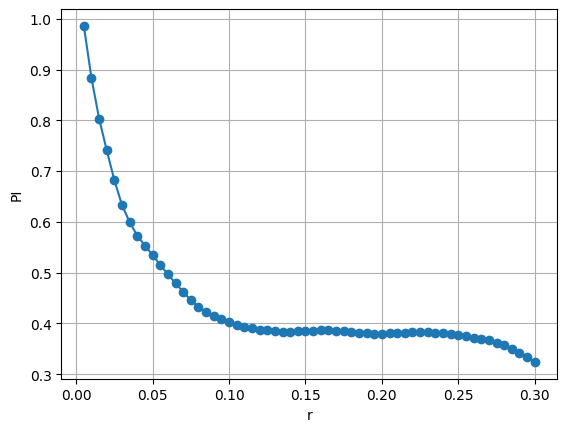

r - globalne minimum: 0.300
----------


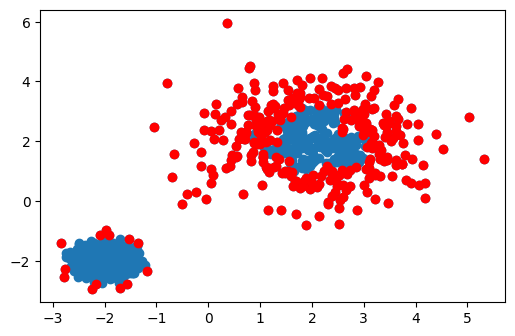

a = 0.01


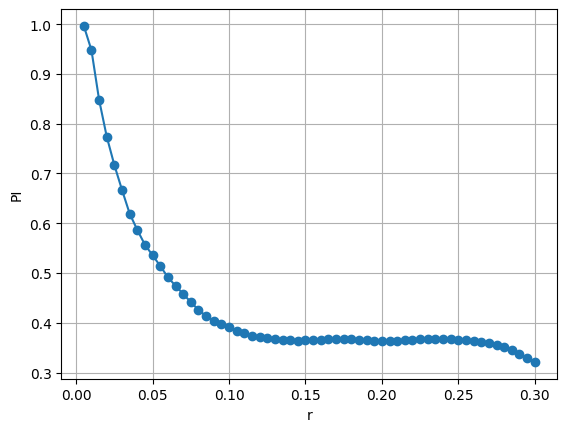

r - globalne minimum: 0.300
----------


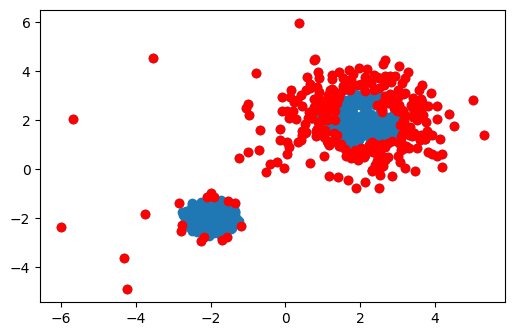

a = 0.02


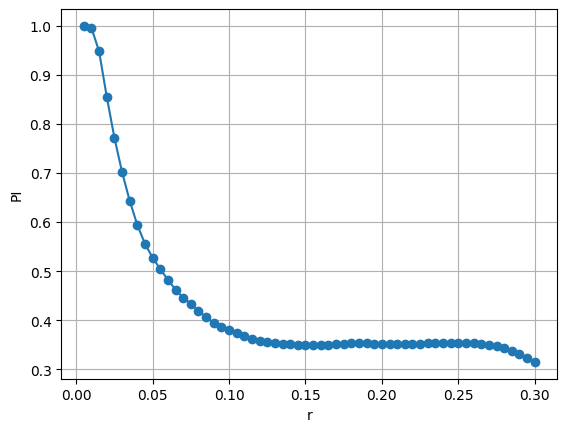

r - globalne minimum: 0.300
----------


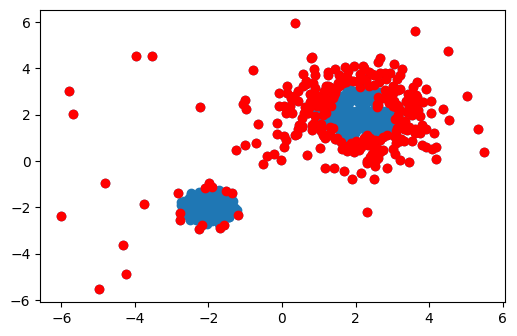

a = 0.03


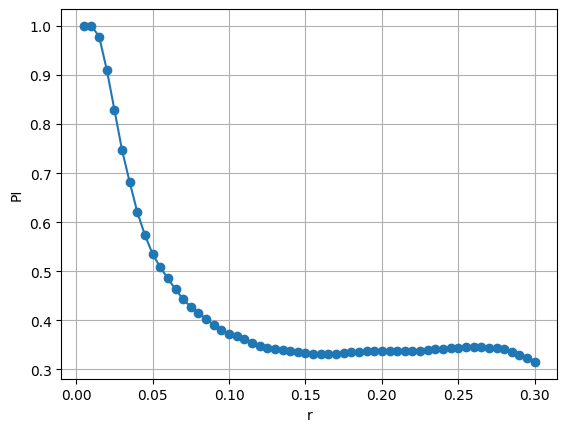

r - globalne minimum: 0.300
----------


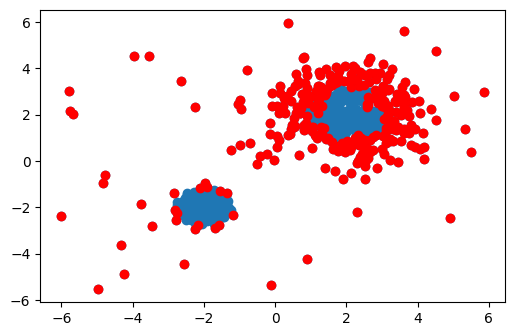

a = 0.04


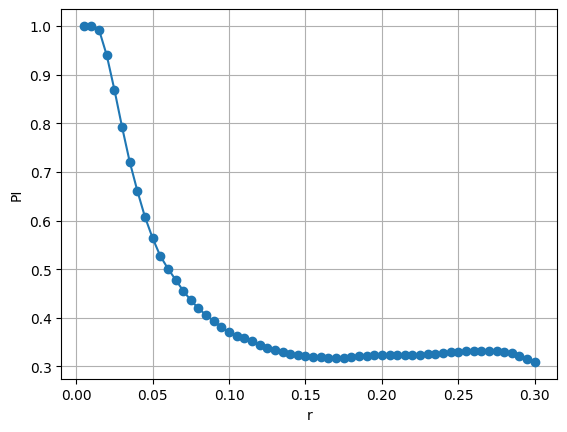

r - globalne minimum: 0.300
----------


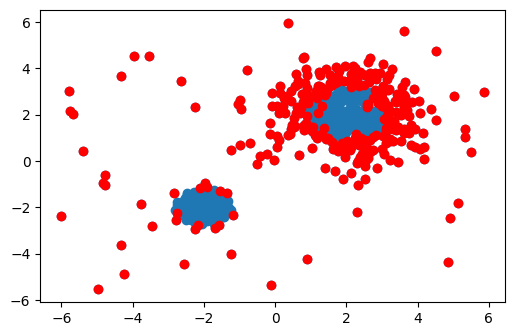

a = 0.05


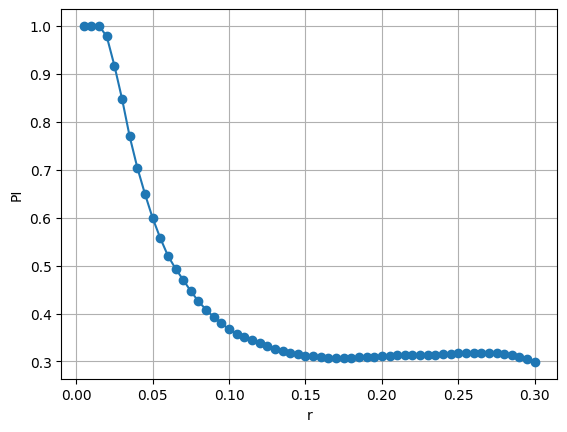

r - globalne minimum: 0.300
----------


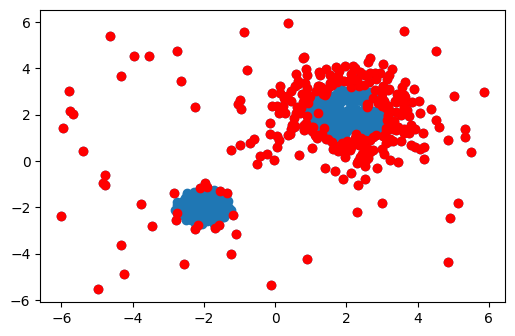

a = 0.06


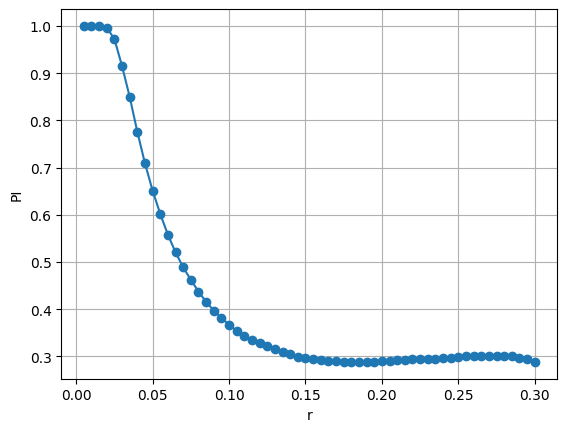

r - globalne minimum: 0.190
----------


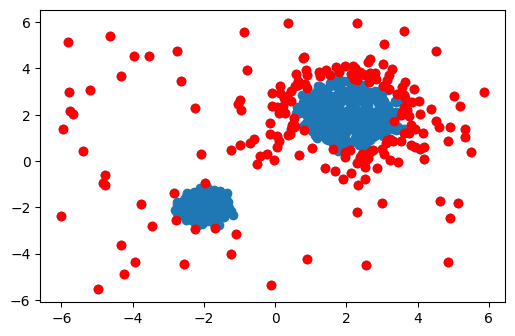

a = 0.07


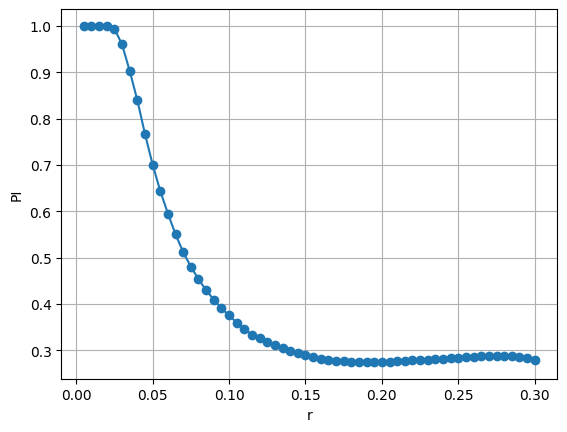

r - globalne minimum: 0.200
----------


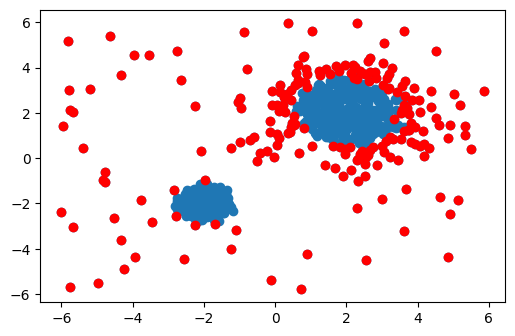

a = 0.08


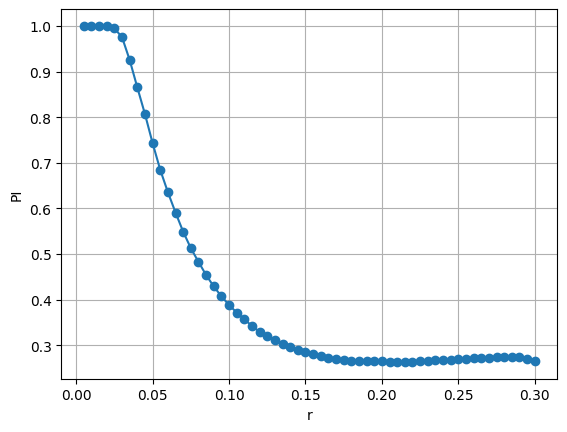

r - globalne minimum: 0.215
----------


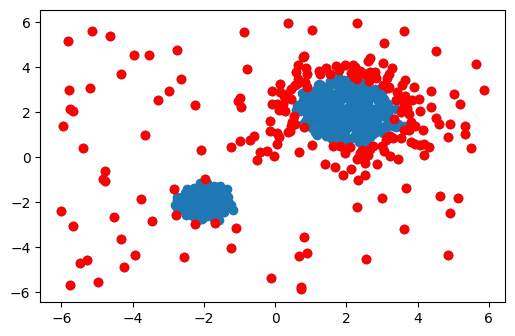

a = 0.09


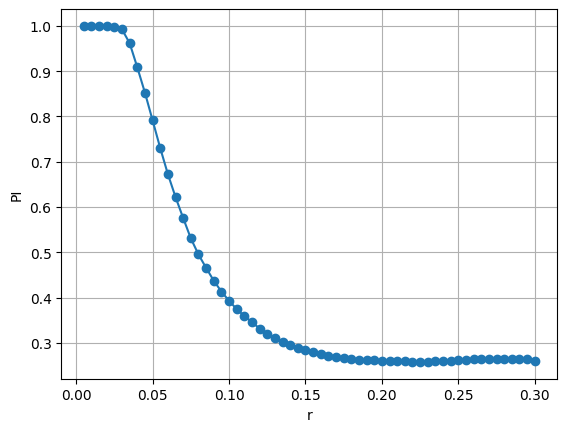

r - globalne minimum: 0.225
----------


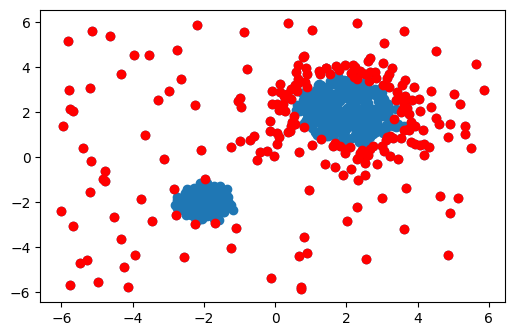

a = 0.1


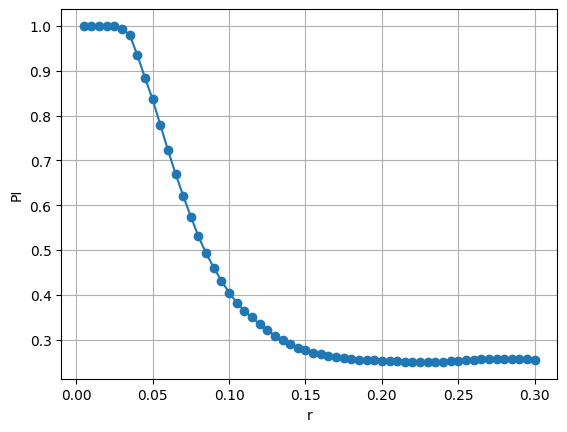

r - globalne minimum: 0.235
----------


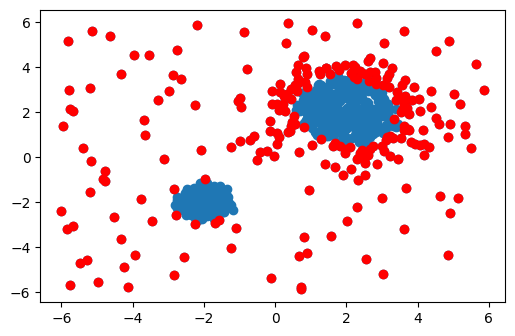

a = 0.11


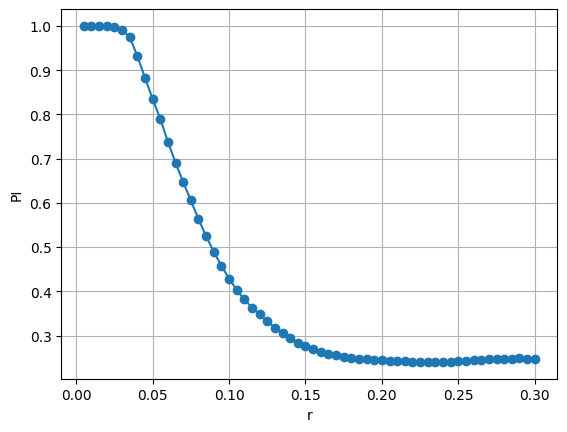

r - globalne minimum: 0.240
----------


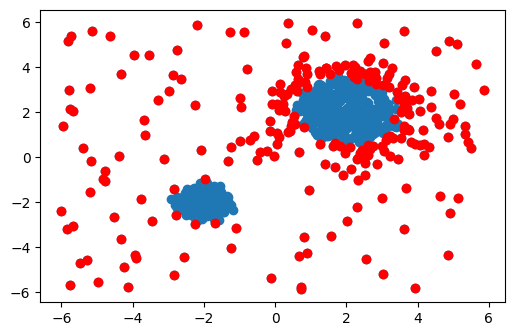

a = 0.12


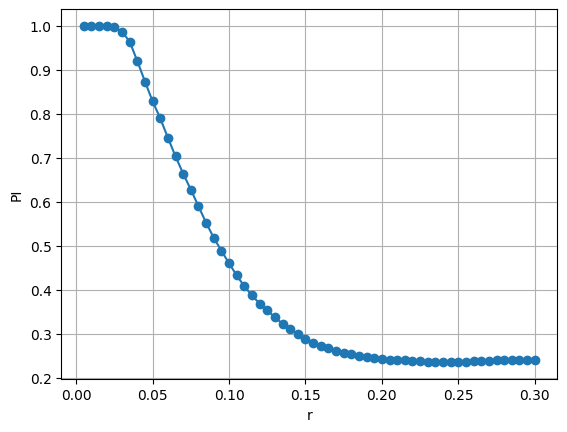

r - globalne minimum: 0.250
----------


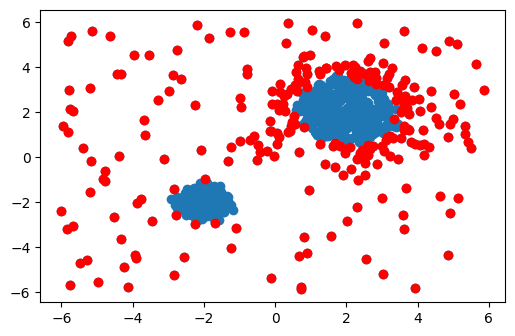

a = 0.13


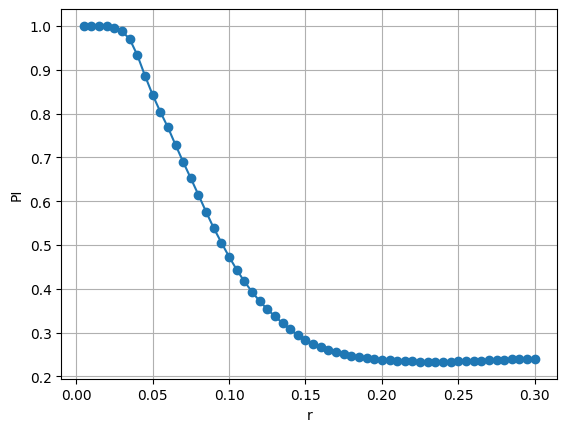

r - globalne minimum: 0.235
----------


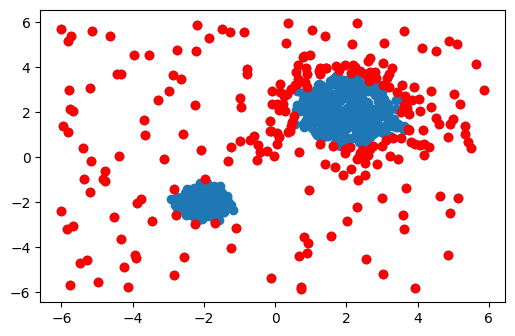

a = 0.14


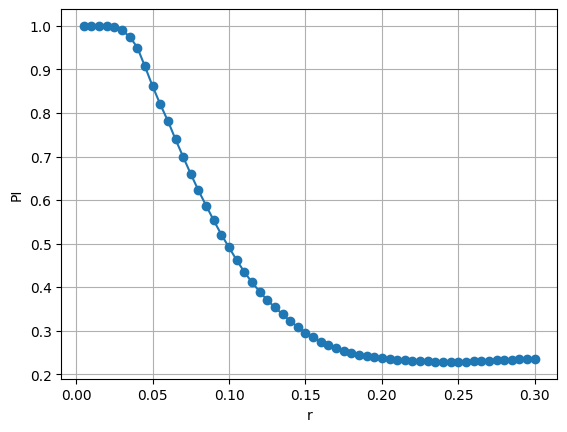

r - globalne minimum: 0.245
----------


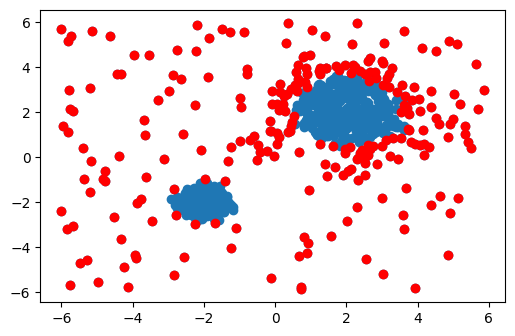

a = 0.15


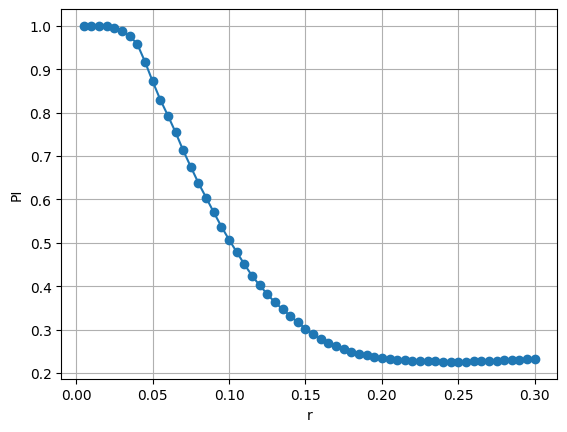

r - globalne minimum: 0.250
----------


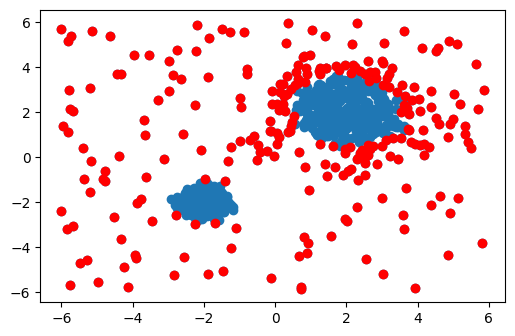

a = 0.16


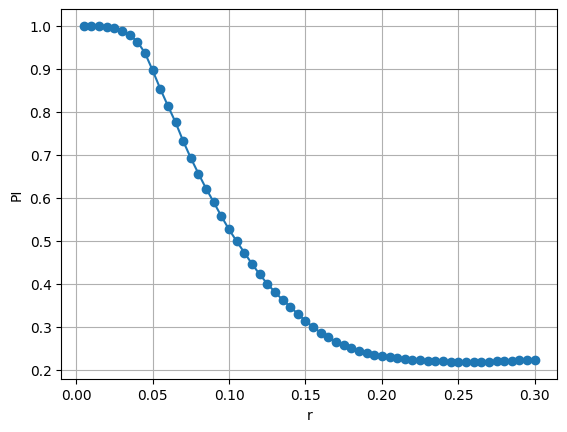

r - globalne minimum: 0.255
----------


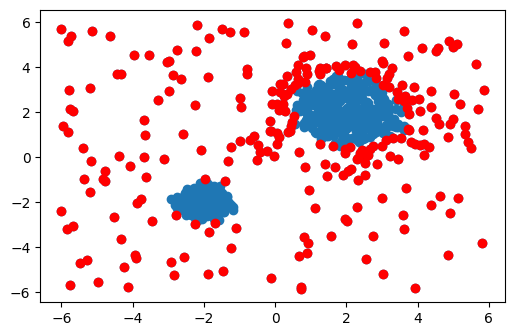

a = 0.17


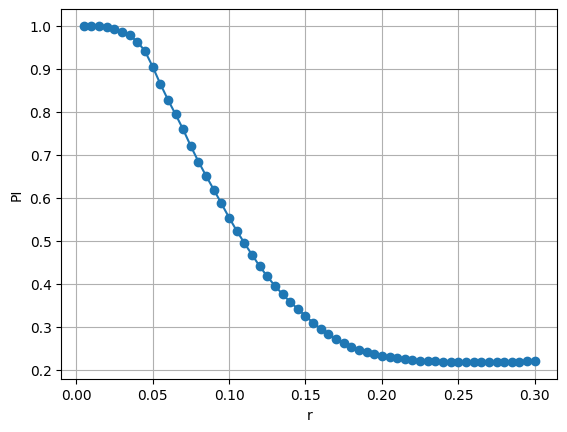

r - globalne minimum: 0.260
----------


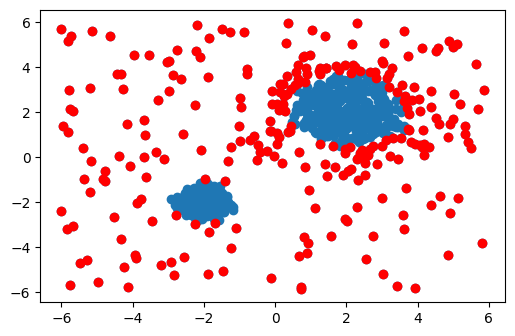

a = 0.18


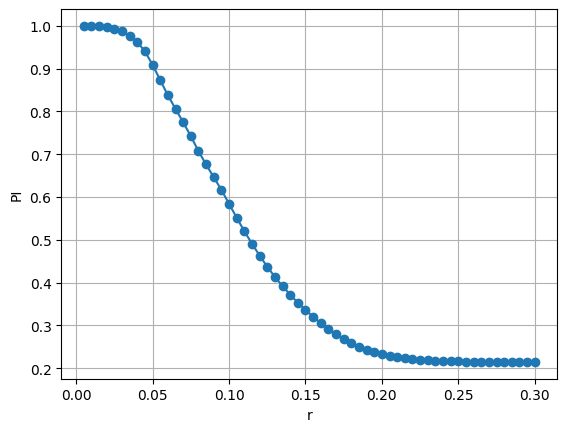

r - globalne minimum: 0.300
----------


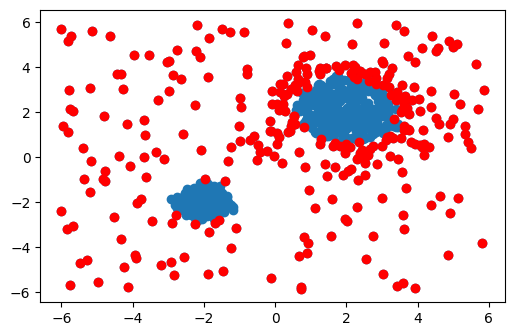

a = 0.19


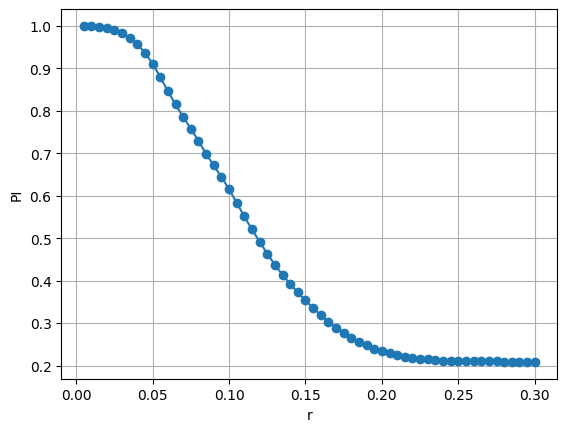

r - globalne minimum: 0.300
----------


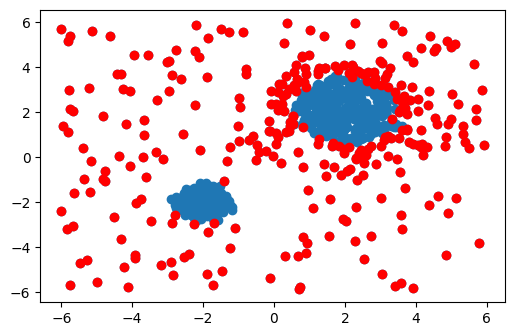

a = 0.2


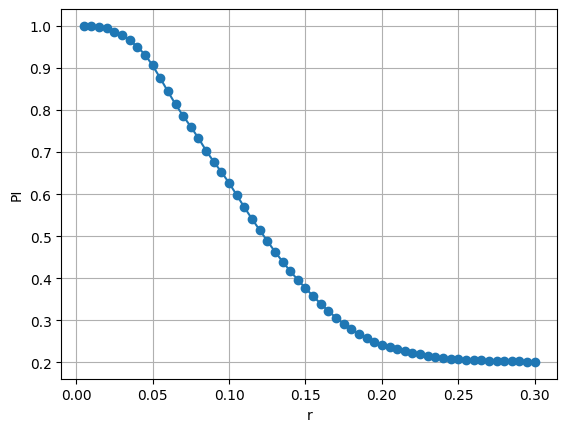

r - globalne minimum: 0.300
----------


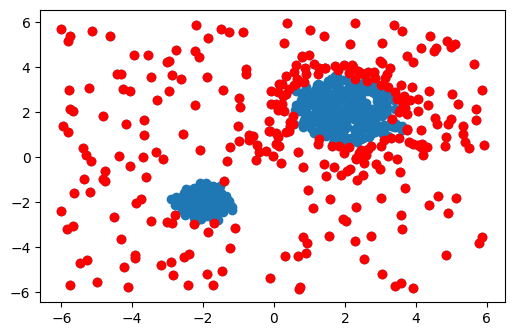

In [3]:
for a in np.arange(0.0, 0.21, 0.01):
    print(f"a = {round(a, 2)}")
    seed = 1
    np.random.seed(seed)

    # Data
    m_train = 1000
    n_outliers = int(a * m_train)
    n_inliers = m_train - n_outliers
    blobs_params = dict(random_state=seed, n_samples=n_inliers, n_features=2)
    x_train = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1, .3], **blobs_params)[0]
    x_train = np.concatenate([x_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
    
    # Run
    global_min, scores = func(x_train)
    
    plt.figure(figsize=(6, 3.8))
    threshold = np.quantile(scores, global_min[1])
    labels_pred = np.where(scores <= threshold, 1, 0)
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    plt.show()